In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan = pd.read_csv('Datasets\\loan_data.csv')

In [3]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


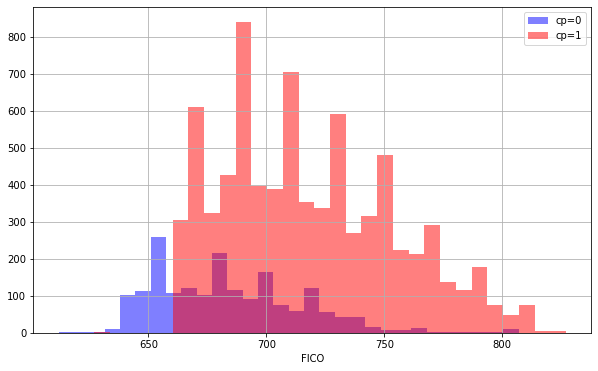

In [6]:
plt.figure(figsize=(10,6))
loan[loan['credit.policy']==0]['fico'].hist(alpha=0.5,color='blue',bins=30,label='cp=0')
loan[loan['credit.policy']==1]['fico'].hist(alpha=0.5,color='red',bins=30,label='cp=1')
plt.xlabel('FICO')
plt.legend()

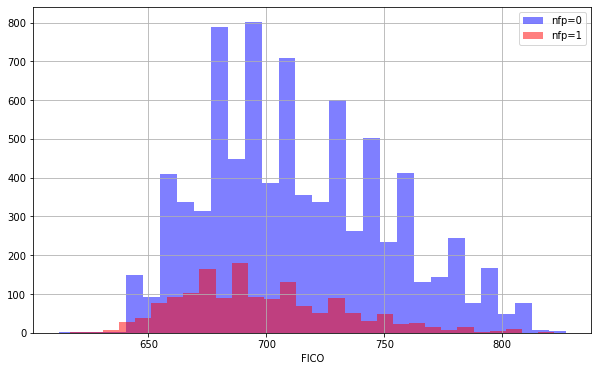

In [7]:
plt.figure(figsize=(10,6))
loan[loan['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='blue',bins=30,label='nfp=0')
loan[loan['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='red',bins=30,label='nfp=1')
plt.xlabel('FICO')
plt.legend()

<AxesSubplot:xlabel='purpose', ylabel='count'>

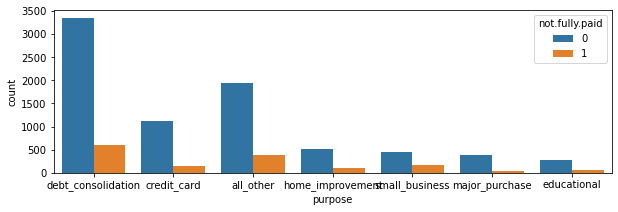

In [8]:
plt.figure(figsize=(10,3))
sns.countplot(x=loan['purpose'],hue=loan['not.fully.paid'])

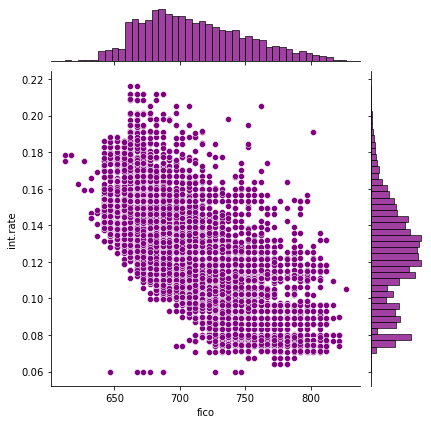

In [9]:
sns.jointplot(x='fico',y='int.rate',data=loan,color='purple')

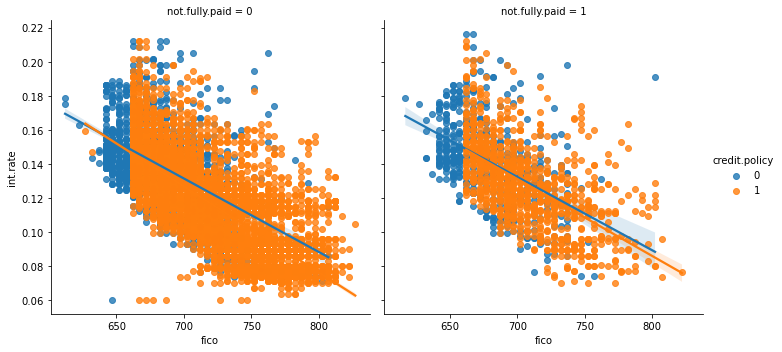

In [10]:
sns.lmplot(x='fico',y='int.rate',data=loan,hue='credit.policy',col='not.fully.paid')

In [11]:
purpose=pd.get_dummies(loan['purpose'],drop_first=True)

In [12]:
loan.drop('purpose',axis=1,inplace=True)
loan=pd.concat([loan,purpose],axis=1)
loan

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [13]:
loan= pd.get_dummies(loan,drop_first=True)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(loan.drop('not.fully.paid',axis=1),loan['not.fully.paid'],random_state=101,test_size=0.33)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree = DecisionTreeClassifier()

In [18]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
pred = dtree.predict(x_test)

In [20]:
df_eval=pd.DataFrame({'Label':y_test,'Pred':pred})

In [21]:
df_eval

,Label,Pred
5244,0,0
1739,0,1
2780,0,0
7062,0,1
6661,0,0
...,...,...
6729,0,0
8884,0,0
4021,0,0
4810,0,0


In [22]:
print(dtree.score(x_test,y_test))

0.719392597279342


In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[2158  508]
 [ 379  116]]


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2666
           1       0.19      0.23      0.21       495

    accuracy                           0.72      3161
   macro avg       0.52      0.52      0.52      3161
weighted avg       0.75      0.72      0.73      3161



In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfc = RandomForestClassifier()

In [27]:
rfc.fit(x_test,y_test)

RandomForestClassifier()

In [28]:
rfc_pred=rfc.predict(x_test)

In [29]:
df_eval = pd.DataFrame({'Label':y_test,'Pred':rfc_pred})
df_eval

,Label,Pred
5244,0,0
1739,0,0
2780,0,0
7062,0,0
6661,0,0
...,...,...
6729,0,0
8884,0,0
4021,0,0
4810,0,0


In [30]:
print(rfc.score(x_test,y_test))

1.0


In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,rfc_pred))

[[2666    0]
 [   0  495]]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2666
           1       1.00      1.00      1.00       495

    accuracy                           1.00      3161
   macro avg       1.00      1.00      1.00      3161
weighted avg       1.00      1.00      1.00      3161



In [33]:
pd.DataFrame({'feat':loan.drop(['not.fully.paid'],axis=1).columns,'value':rfc.feature_importances_*100}).sort_values('value',ascending=False).reset_index().drop('index',axis=1)

,feat,value
0,dti,11.469590
1,days.with.cr.line,11.241987
2,log.annual.inc,11.097653
3,installment,11.009547
4,revol.bal,10.833864
5,revol.util,10.749263
6,int.rate,10.699220
7,fico,8.278344
8,inq.last.6mths,5.697637
9,delinq.2yrs,1.456524
